In [ ]:
!nvidia-smi

Fri May 17 10:57:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="TykOw2mxQF7041me6Jjc")
project = rf.workspace("asdd-w2kus").project("asfd55")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to asfd55-1 in yolov8:: 100%|██████████| 53964/53964 [00:15<00:00, 3558.83it/s] 


In [ ]:
from glob import glob
import shutil
images_path = glob("/content/datasets/asfd55-1/train/images/*.jpg")
testfold_paths = images_path[:100]

os.makedirs("/content/datasets/asfd55-1/test/images/", exist_ok=True)
os.makedirs("/content/datasets/asfd55-1/test/labels/", exist_ok=True)


# Move each file to the destination directory
for testfold_path in testfold_paths:
    shutil.move(testfold_path, "/content/datasets/asfd55-1/test/images/")
    shutil.move(testfold_path.replace('/images/', '/labels/').replace('.jpg', '.txt'), "/content/datasets/asfd55-1/test/labels/")


In [20]:
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=5, imgsz=320)

New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=/content/datasets/asfd55-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augmen

In [32]:
model = YOLO('runs/pose/train2/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)


image 1/1 /content/datasets/asfd55-1/test/images/000000463732_jpg.rf.72220bcaf67db88362cad2717157e731.jpg: 640x640 2 persons, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9881, 0.9841, 0.9417, 0.9414, 0.6176, 0.9972, 0.9898, 0.9890, 0.8830, 0.9677, 0.8397, 0.9971, 0.9936, 0.8599, 0.7199, 0.1328, 0.0782],
        [0.9809, 0.9465, 0.9718, 0.7371, 0.8650, 0.9637, 0.9905, 0.7259, 0.9411, 0.6331, 0.8681, 0.8423, 0.9154, 0.2738, 0.4354, 0.0684, 0.1052]], device='cuda:0')
data: tensor([[[3.6823e+02, 1.7412e+02, 9.8813e-01],
         [3.8505e+02, 1.6550e+02, 9.8411e-01],
         [3.5706e+02, 1.6393e+02, 9.4166e-01],
         [4.0704e+02, 1.7897e+02, 9.4140e-01],
         [3.4099e+02, 1.7530e+02, 6.1763e-01],
         [4.1775e+02, 2.4487e+02, 9.9719e-01],
         [2.8966e+02, 2.3569e+02, 9.8976e-01],
         [3.7590e+02, 3.0935e+02, 9.8904e-01],
         [2.1641e+02, 2.8865e+02, 8.8300e-01],
         [2.6034e+02, 3.0304e+02, 9.6767e-01],
         [2.0290e+02, 3.1313e+02, 8.3971e-01],
         [3.6877e+02, 4.3880e+02, 9.9710e-01],
         [2.8614e+02, 4.3542e+02, 9.9358e-01],
     

We can visualize our keypoints using the following code:

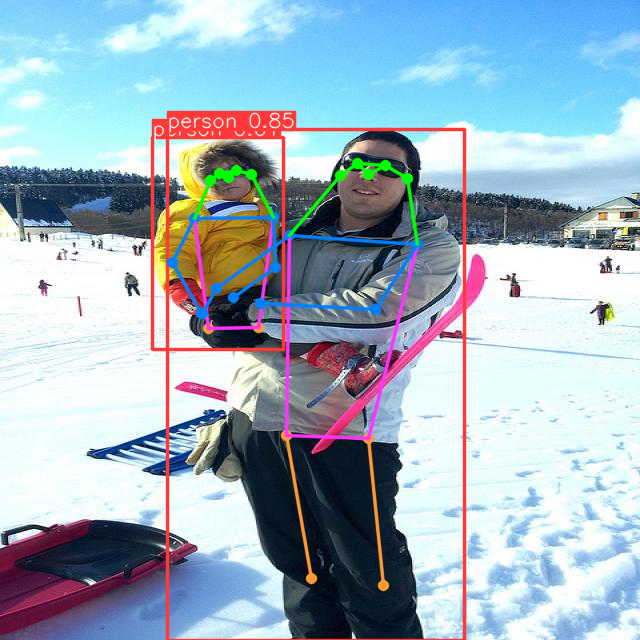

In [33]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)